# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.420  1  0.879 0.350 0.005   
                             age        0.030  1  0.062 0.804 0.000   
                             Kiel       1.561  1  3.268 0.072 0.017   
                             Magdeburg  4.261  1  8.923 0.003 0.045   
                             Sweden     7.382  1 15.458 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.209  1  0.239 0.626 0.001   
                             age        3.778  1  4.315 0.039 0.022   
                             Kiel       0.273  1  0.312 0.577 0.002   
                             Magdeburg  2.137  1  2.441 0.120 0.013   
                             Sweden    16.884  1 19.286 0.000 0.092   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.456  0.513    False  
                             age               0.095  0.884    False  
                             Kiel              1.141  0.162    False  
                             Magdeburg         2.497  0.013     True  
                             Sweden            3.928  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.204  0.752    False  
                             age               1.408  0.101    False  
                             Kiel              0.239  0.713    False  
                             Magdeburg         0.921  0.241    False  
                             Sweden            4.730  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.763  1  4.793 0.030 0.024   
                             age        0.011  1  0.070 0.791 0.000   
                             Kiel       0.428  1  2.688 0.103 0.014   
                             Magdeburg  0.935  1  5.870 0.016 0.030   
                             Sweden     2.466  1 15.489 0.000 0.075   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.816  1  1.444 0.231 0.008   
                             age        3.723  1  1.909 0.169 0.010   
                             Kiel      12.606  1  6.465 0.012 0.033   
                             Magdeburg 20.149  1 10.333 0.002 0.051   
                             Sweden     0.077  1  0.039 0.843 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.526  0.076    False  
                             age               0.102  0.867    False  
                             Kiel              0.988  0.203    False  
                             Magdeburg         1.787  0.046     True  
                             Sweden            3.935  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.636  0.371    False  
                             age               0.773  0.294    False  
                             Kiel              1.928  0.035     True  
                             Magdeburg         2.814  0.006     True  
                             Sweden            0.074  0.901    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.350         0.456  0.513    False   
                             age       0.804         0.095  0.884    False   
                             Kiel      0.072         1.141  0.162    False   
                             Magdeburg 0.003         2.497  0.013     True   
                             Sweden    0.000         3.928  0.001     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.626         0.204  0.752    False   
                             age       0.039         1.408  0.101    False   
                             Kiel      0.577         0.239  0.713    False   
                             Magdeburg 0.120         0.921  0.241    False   
                             Sweden    0.000         4.730  0.000     True   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.030         1.526  0.076    False  
                             age       0.791         0.102  0.867    False  
                             Kiel      0.103         0.988  0.203    False  
                             Magdeburg 0.016         1.787  0.046     True  
                             Sweden    0.000         3.935  0.001     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.231         0.636  0.371    False  
                             age       0.169         0.773  0.294    False  
                             Kiel      0.012         1.928  0.035     True  
                             Magdeburg 0.002         2.814  0.006     True  
                             Sweden    0.843         0.074  0.901    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.477     0.338     0.246         2.733     0.313
std       0.303         5.303     0.331     0.299         5.144     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.331     0.016     0.002         0.361     0.008
50%       0.122         0.912     0.245     0.095         1.022     0.190
75%       0.467         2.410     0.623     0.436         2.709     0.581
max       0.999       143.434     0.999     1.000        82.295     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.350         0.456   
A0A024R0T9;K7ER74;P02655                           AD     0.037         1.426   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.106         0.976   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.533         0.274   
A0A075B6H7                                         AD     0.153         0.816   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.023         1.637   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.207         0.685   
S4R3U6                                             AD     0.626         0.204   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.513    False   
A0A024R0T9;K7ER74;P02655                           AD      0.097    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.219    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.678    False   
A0A075B6H7                                         AD      0.286    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.316    False   
Q9Y6X5                                             AD      0.066    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.182    False   
Q9Y6Y9                                             AD      0.356    False   
S4R3U6                                             AD      0.752    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.030         1.526   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.523   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.307         0.512   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.295         0.530   
A0A075B6H7                                         AD     0.337         0.472   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.036         1.444   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.757         0.121   
S4R3U6                                             AD     0.231         0.636   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.076    False  
A0A024R0T9;K7ER74;P02655                           AD      0.076    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.458    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.444    False  
A0A075B6H7                                         AD      0.489    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.404     0.338     0.252         1.478     0.325
std       0.292         1.646     0.317     0.293         1.772     0.317
min       0.000         0.001     0.000     0.000         0.002     0.000
25%       0.012         0.357     0.040     0.010         0.350     0.030
50%       0.131         0.883     0.257     0.114         0.942     0.220
75%       0.439         1.906     0.599     0.447         2.021     0.591
max       0.997        23.309     0.998     0.996        24.963     0.998

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1035,1002


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.350         0.456  0.513   
A0A024R0T9;K7ER74;P02655                           0.037         1.426  0.097   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.106         0.976  0.219   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.533         0.274  0.678   
A0A075B6H7                                         0.153         0.816  0.286   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.316   
Q9Y6X5                                             0.023         1.637  0.066   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.182   
Q9Y6Y9                                             0.207         0.685  0.356   
S4R3U6                                             0.626         0.204  0.752   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.030   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.307   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.295   
A0A075B6H7                                            False 0.337   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.036   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.757   
S4R3U6                                                False 0.231   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.526  0.076   
A0A024R0T9;K7ER74;P02655                                   1.523  0.076   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.512  0.458   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.530  0.444   
A0A075B6H7                                                 0.472  0.489   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.303   
Q9Y6X5                                                     1.444  0.087   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.172   
Q9Y6Y9                                                     0.121  0.841   
S4R3U6                                                     0.636  0.371   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    970
PI (yes) - QRILC (yes)   354
PI (no)  - QRILC (yes)    65
PI (yes) - QRILC (no)     32
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A075B6I0                                         0.034         1.473  0.090   
A0A075B6S5                                         0.220         0.659  0.372   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2              0.002         2.772  0.008   
A0A087WWT2;Q9NPD7                                  0.032         1.499  0.086   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2           0.002         2.627  0.010   
...                                                  ...           ...    ...   
Q9NZR2                                             0.043         1.371  0.107   
Q9P0K9                                             0.037         1.435  0.096   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI... 0.012         1.929  0.039   
Q9UNW1                                             0.010         2.000  0.034   
Q9UQ52                                             0.071         1.147  0.161   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A075B6I0                                            False 0.002   
A0A075B6S5                                            False 0.013   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                  True 0.174   
A0A087WWT2;Q9NPD7                                     False 0.008   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2               True 0.076   
...                                                     ...   ...   
Q9NZR2                                                False 0.012   
Q9P0K9                                                False 0.009   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...     True 0.074   
Q9UNW1                                                 True 0.113   
Q9UQ52                                                False 0.007   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A075B6I0                                                 2.638  0.009   
A0A075B6S5                                                 1.885  0.038   
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                      0.760  0.301   
A0A087WWT2;Q9NPD7                                          2.114  0.025   
A0A087X152;D6RE16;E0CX15;O95185;O95185-2                   1.120  0.159   
...                                                          ...    ...   
Q9NZR2                                                     1.929  0.035   
Q9P0K9                                                     2.035  0.029   
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...         1.131  0.156   
Q9UNW1                                                     0.948  0.218   
Q9UQ52                                                     2.147  0.023   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A075B6I0                                             True       194  
A0A075B6S5                                             True       129  
A0A087WTT8;A0A0A0MQX5;O94779;O94779-2                 False       114  
A0A087WWT2;Q9NPD7                                      True       193  
A0A087X152;D6RE16;E0CX15;O95185;O95185-2              False       176  
...                                                     ...       ...  
Q9NZR2                                                 True       145  
Q9P0K9                                                 True       192  
Q9UIB8;Q9UIB8-2;Q9UIB8-3;Q9UIB8-4;Q9UIB8-5;Q9UI...    False       115  
Q9UNW1                               

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.513,0.076,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.097,0.076,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.219,0.458,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.678,0.444,196,PI (no) - QRILC (no)
A0A075B6H7,0.286,0.489,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.316,0.303,197,PI (no) - QRILC (no)
Q9Y6X5,0.066,0.087,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.182,0.172,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P20138;P20138-2,0.014,0.908,54,PI (yes) - QRILC (no),0.894
J3KSJ8;Q9UD71;Q9UD71-2,0.654,0.008,51,PI (no) - QRILC (yes),0.646
P04179,0.630,0.003,148,PI (no) - QRILC (yes),0.627
A0A1W2PQ94;B4DS77;B4DS77-2;B4DS77-3,0.618,0.005,69,PI (no) - QRILC (yes),0.613
Q9H492;Q9H492-2,0.556,0.000,104,PI (no) - QRILC (yes),0.556
...,...,...,...,...,...
K7ERI9;P02654,0.041,0.054,196,PI (yes) - QRILC (no),0.013
O75493,0.056,0.047,167,PI (no) - QRILC (yes),0.009
K7ERG9;P00746,0.052,0.048,197,PI (no) - QRILC (yes),0.004


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


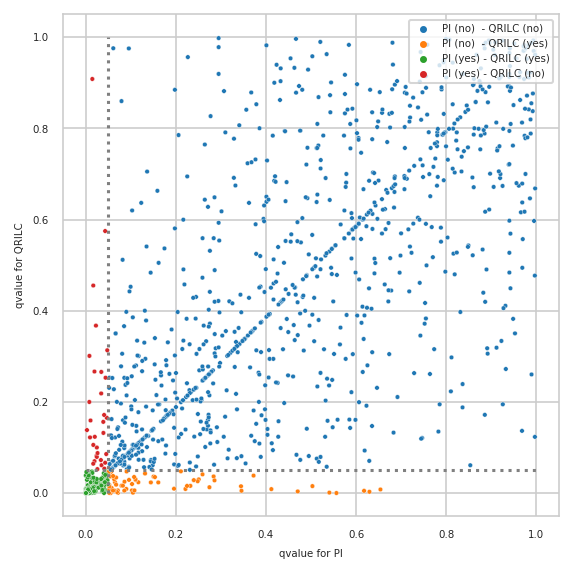

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


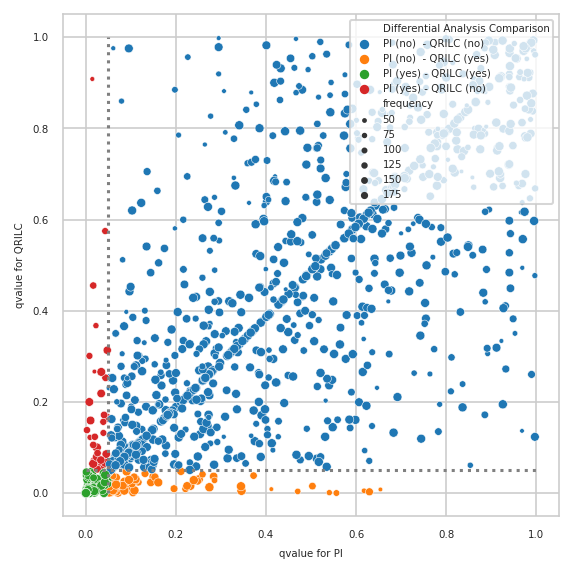

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
CLU,ENSP00000315130,4.263
...,...,...
HBS1L,ENSP00000356811,0.508
SMAD9,ENSP00000369154,0.506
ANKRD11,ENSP00000301030,0.505


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/usr/share/miniconda3/envs/vaep/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out